# Introduction

Read data, and create functions to transform, select features, and train the model. 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [2]:
housing_data = pd.read_csv('AmesHousing.tsv', sep='\t')
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
#housing_data.info

In [4]:
#create a function to return the train data for the 1st half of rows
def transform_features(df):
    number_of_rows = df.shape[0]
    train = df.loc[0:(number_of_rows / 2)]
    return train
train = transform_features(housing_data)

In [5]:
train.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [6]:
#create a function to select 'Gr Liv Area' and 'SalePrice' columns
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]
train_select = select_features(train)

In [7]:
train_select

,Gr Liv Area,SalePrice
0,1656,215000
1,896,105000
2,1329,172000
3,2110,244000
4,1629,189900
5,1604,195500
6,1338,213500
7,1280,191500
8,1616,236500
9,1804,189000


In [8]:
columns_train = list(train_select.columns)
columns_train.remove('SalePrice')
#columns_train = train_select.columns.remove('SalePrice')
print(columns_train)

['Gr Liv Area']


In [9]:
#create a function to train and test the model
def train_and_test(df):
    train = housing_data.loc[0:1460]
    test = housing_data.loc[1460:]
    columns_train = list(df.columns)
    columns_train.remove('SalePrice')
    reg = LinearRegression().fit(train[columns_train], train['SalePrice'])
    prediction = reg.predict(test[columns_train])
    rmse = (mean_squared_error(test['SalePrice'], prediction)) ** 0.5
    return rmse
test_rmse = train_and_test(train_select)
test_rmse

57090.79429669655

We find that training model on 'Gr Liv Area' and 'SalePrice' and predicting SalePrice within test set returns RMSE of $57k. 

# Feature Engineering

In this step, I am making adjustment in transform_features() function so any column or feature with 25% missing values will be dropped. 

Generally, I need to remove features we don't need, tranform features into proper format, or create new features based on understanding of the data. 

In [10]:
def transform_features(df):
    number_of_rows = df.shape[0]
    train = df.loc[0:(number_of_rows / 2)].copy()
    return train
train = transform_features(housing_data)
train

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [11]:
# Now I will start to handle the missing values in the original df.
# First look at how many missing value the orginal dataframe has.
housing_data.isnull().sum().value_counts()

0       55
1        7
159      4
80       3
23       2
2        2
490      1
2917     1
83       1
81       1
2358     1
2732     1
157      1
1422     1
2824     1
dtype: int64

In [12]:
#Drop any column with more than 5% missing values.
df_null_counts = housing_data.isnull().sum()
total_rows = train.shape[0]
housing_data = housing_data[df_null_counts[(df_null_counts / total_rows) < 0.05].index]
#for col in housing_data.columns:
    #housing_data[col] = housing_data[col].fillna(housing_data[col].mode())
housing_data.isnull().sum().value_counts()

0     55
1      7
23     2
2      2
dtype: int64

In [13]:
list(housing_data.columns)

['Order',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Area',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Garage Cars',
 'Garage Area',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'Sale Type',
 'Sale

In [14]:
#for text columns, I am dropping any column with one or more missing values
missing_text = housing_data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
cols_to_drop_missingtext = missing_text[missing_text > 0]
housing_data = housing_data.drop(cols_to_drop_missingtext.index, axis=1)
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [15]:

housing_data.isnull().sum().value_counts()

0     55
1      6
2      2
23     1
dtype: int64

In [16]:
#Now need to fill the missing values in each column with the most common value of that column.
#First look at which numeric columns contain missing values
missing_values = housing_data.select_dtypes(include=['int', 'float']).isnull().sum()
mvs = missing_values[missing_values > 0]
mvs

Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64

In [17]:
for col in mvs.index:
    common_v = housing_data[col].mode()
    housing_data[col].fillna(common_v)
housing_data.isnull().sum().value_counts()

0     55
1      6
2      2
23     1
dtype: int64

In [18]:
common_v_dict = housing_data[mvs.index].mode().to_dict(orient='records')[0]
common_v_dict

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [19]:
housing_data = housing_data.fillna(common_v_dict)
housing_data.isnull().sum().value_counts()

0    64
dtype: int64

In [20]:
#create a new feature/column called "years_until_remod" using the difference between "Year Built" and "Year Remod/Add" to capture how old the property is. 
housing_data['years_since_remod'] = housing_data['Yr Sold'] - housing_data['Year Remod/Add']
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,years_since_remod
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,5,2010,WD,Normal,215000,50
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,120,0,0,6,2010,WD,Normal,105000,49
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,12500,6,2010,WD,Normal,172000,52
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,4,2010,WD,Normal,244000,42
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,3,2010,WD,Normal,189900,12


In [21]:
housing_data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'Sale Ty

In [22]:
# create a new column for total years from build to sale.
housing_data['years_until_sold'] = housing_data['Yr Sold'] - housing_data['Year Built']
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,years_since_remod,years_until_sold
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,5,2010,WD,Normal,215000,50,50
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,120,0,0,6,2010,WD,Normal,105000,49,49
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,12500,6,2010,WD,Normal,172000,52,52
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,4,2010,WD,Normal,244000,42,42
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,3,2010,WD,Normal,189900,12,13


In [23]:
housing_data = housing_data[housing_data['years_since_remod'] >= 0]
housing_data = housing_data[housing_data['years_until_sold'] >= 0]
housing_data.shape[0]

2927

In [24]:
#No longer need "Year Built", "Year Remod/Add" columns
housing_data = housing_data.drop(["Year Built", "Year Remod/Add"], axis = 1)

In [25]:
#Now drop columns not useful for ML or leaks data about final sale. 
housing_data = housing_data.drop(["PID", "Order" ,"Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
housing_data.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_since_remod,years_until_sold
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,210,62,0,0,0,0,0,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,140,0,0,0,120,0,0,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,0,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,212,34,0,0,0,0,0,189900,12,13


Now, update the "transform_features" functions and apply it to the housing data frame.

In [26]:
def transform_features(df):
    #Drop any column with more than 5% missing values.
    df_null_counts = df.isnull().sum()
    total_rows = df.shape[0]
    df = df[df_null_counts[(df_null_counts / total_rows) < 0.05].index]
    
    #for text columns, I am dropping any column with one or more missing values
    missing_text = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    cols_to_drop_missingtext = missing_text[missing_text > 0]
    df = df.drop(cols_to_drop_missingtext.index, axis=1)
    
    #Now need to fill the missing values in each column with the most common value of that column.
    #First look at which numeric columns contain missing values
    missing_values = df.select_dtypes(include=['int', 'float']).isnull().sum()
    mvs = missing_values[missing_values > 0]
    common_v_dict = df[mvs.index].mode().to_dict(orient='records')[0]
    df = df.fillna(common_v_dict)
    
    #create a new feature/column called "years_until_remod" using the difference between "Year Built" and "Year Remod/Add" to capture how old the property is. 
    df['years_since_remod'] = df['Yr Sold'] - df['Year Remod/Add']
    
    # create a new column for total years from build to sale.
    df['years_until_sold'] = df['Yr Sold'] - df['Year Built']
    
    # drop rows with negative values for "years_since_remod" and "years_until_sold"
    df = df[df['years_since_remod'] >= 0]
    df = df[df['years_until_sold'] >= 0]
    
    #No longer need "Year Built", "Year Remod/Add" columns
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
    
    #Now drop columns not useful for ML or leaks data about final sale. 
    df = df.drop(["PID", "Order" ,"Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    
    return df





In [27]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

def train_and_test(df):
    train = df.loc[0:1460]
    test = df.loc[1460:]
    columns_train = list(df.columns)
    columns_train.remove('SalePrice')
    reg = LinearRegression().fit(train[columns_train], train['SalePrice'])
    prediction = reg.predict(test[columns_train])
    rmse = (mean_squared_error(test['SalePrice'], prediction)) ** 0.5
    return rmse

Use updated functions to apply to housing_data dataframe

In [28]:
housing_data_2 = pd.read_csv('AmesHousing.tsv', sep='\t')

In [29]:
transformed_housing2 = transform_features(housing_data_2)

In [30]:
selected_features_housing2 = select_features(transformed_housing2)

In [31]:
rmse_housing2 = train_and_test(selected_features_housing2)
rmse_housing2

55275.80582387587

# Feature Selection

In [32]:
# draw a heatmap matrix of the numerical features with 'SalePrice' in the training data set. 
# Select only numerical columns
numerical_housing2 = transformed_housing2.select_dtypes(include=['int', 'float'])
numerical_housing2.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_since_remod,years_until_sold
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,...,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,...,140,0,0,0,120,0,0,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,...,393,36,0,0,0,0,12500,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,...,0,0,0,0,0,0,0,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,...,212,34,0,0,0,0,0,189900,12,13


In [33]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = abs(transformed_housing2.corr())
corr_matrix['SalePrice'].sort_values()

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
years_since_remod    0.534985
Full Bath            0.546118
years_until_sold     0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: Sale

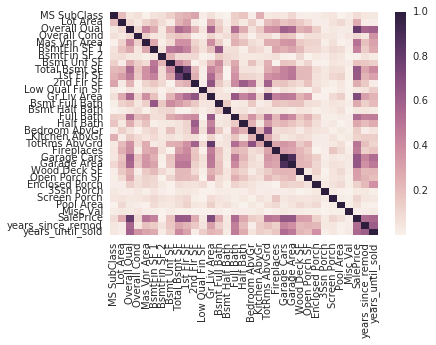

In [34]:
%matplotlib inline
corr_matrix
hm = sns.heatmap(corr_matrix)
hm

We can see that Overall Quality of the house has the strongest correlation with SalePrice. 

In [35]:
# For now, I will just keep the features with correlation coefficient above 0.4
significant_num_housing2 = numerical_housing2.drop(corr_matrix[corr_matrix['SalePrice'] < 0.4].index, axis=1)
significant_num_housing2.head(10)

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice,years_since_remod,years_until_sold
0,6,112.0,639.0,1080.0,1656,1656,1,7,2,2.0,528.0,215000,50,50
1,5,0.0,468.0,882.0,896,896,1,5,0,1.0,730.0,105000,49,49
2,6,108.0,923.0,1329.0,1329,1329,1,6,0,1.0,312.0,172000,52,52
3,7,0.0,1065.0,2110.0,2110,2110,2,8,2,2.0,522.0,244000,42,42
4,5,0.0,791.0,928.0,928,1629,2,6,1,2.0,482.0,189900,12,13
5,6,20.0,602.0,926.0,926,1604,2,7,1,2.0,470.0,195500,12,12
6,8,0.0,616.0,1338.0,1338,1338,2,6,0,2.0,582.0,213500,9,9
7,8,0.0,263.0,1280.0,1280,1280,2,5,0,2.0,506.0,191500,18,18
8,8,0.0,1180.0,1595.0,1616,1616,2,5,1,2.0,608.0,236500,14,15
9,7,0.0,0.0,994.0,1028,1804,2,7,1,2.0,442.0,189000,11,11


Now need to determine which features are categorical and which of those categorical features need to be dropped. 

In [36]:
significant_num_housing2.nunique()

Overall Qual           10
Mas Vnr Area          444
BsmtFin SF 1          993
Total Bsmt SF        1056
1st Flr SF           1081
Gr Liv Area          1289
Full Bath               5
TotRms AbvGrd          13
Fireplaces              5
Garage Cars             6
Garage Area           602
SalePrice            1029
years_since_remod      61
years_until_sold      127
dtype: int64

After reading documentation, I summarize the potential categorical features in the original dataframe

In [37]:
cat_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [38]:
#now need to determine which are still included in significant_num_housing2 dataframe as numerical.
cat_features_carried = []
for col in cat_features:
    if col in significant_num_housing2.columns:
        cat_features_carried.append(col)
        
cat_features_carried

[]

Now we know there is no categorical features included in the significant_num_housing2 dataframe. 

In [39]:
#check if these categorical features are already included in the significant_num_housing2 dataframe, how many unique values each categorical features contain
#the Purpose is to drop the categorical features with too many unique values
unique_counts = significant_num_housing2[cat_features_carried].apply(lambda col: len(col.value_counts()))
unique_counts

Series([], dtype: float64)

In [40]:
#Drop categorical features that include more than 10 unique values
#because too many unique values in categorical features will result in too many dummy variable columns
cols_to_drop = unique_counts[unique_counts > 10].index
significant_num_housing2 = significant_num_housing2.drop(cols_to_drop, axis=1)


In [41]:
#Choose the columns that are "object", not "numerical"
text_cols = significant_num_housing2.select_dtypes(include=['object'])

#convert those text columns from "object" to "categorical"
for col in text_cols:
    significant_num_housing2[col] = significant_num_housing2[col].astype(include=['category'])
    
#create dummy variables for the categorical features
significant_num_housing2 = pd.concat([significant_num_housing2, 
                                      pd.get_dummies(significant_num_housing2.select_dtypes(include=['category']))
                                     ], axis=1)
significant_num_housing2.drop(text_cols, axis=1)

ValueError: No objects to concatenate

Now need to update the select_feature function

In [48]:
def select_features(df):
    # select numerical features within the df
    numerical_df = df.select_dtypes(include=['int', 'float'])
    
    # calculate the correlation of all the numerical features
    corr_matrix = abs(numerical_df.corr())
    
    # keep the numercial features with correlation coef above 0.4
    df = df.drop(corr_matrix[corr_matrix['SalePrice'] < 0.4].index, axis=1)
    
    # list all possible categorical features, no matter they are included in the df
    cat_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    # see if any of above listed features are included in the current df
    cat_features_carried = []
    for col in cat_features:
        if col in df.columns:
            cat_features_carried.append(col)
    
    # then check out the number of unique values in those categorical features included in the df
    # if unique value count is above 10, drop that feature because it is too hard to use dummy variables on them
    unique_counts = df[cat_features_carried].apply(lambda col: len(col.value_counts()))
    cols_to_drop = unique_counts[unique_counts > 10].index
    df = df.drop(cols_to_drop, axis=1)
    
    #Choose the columns that are "object", not "numerical"
    text_cols = df.select_dtypes(include=['object'])

    #convert those text columns from "object" to "categorical"
    for col in text_cols:
        df[col] = df[col].astype('category')
    
    #create dummy variables for the categorical features
    df = pd.concat([df, 
                    pd.get_dummies(df.select_dtypes(include=['category']))
                    ], axis=1)
    # drop the original object columns after introducing dummies
    df = df.drop(text_cols, axis=1)
    return df

# Now update the train_and_test function

In [ ]:
# original train_and_test
def train_and_test(df):
    train = df.loc[0:1460]
    test = df.loc[1460:]
    columns_train = list(df.columns)
    columns_train.remove('SalePrice')
    reg = LinearRegression().fit(train[columns_train], train['SalePrice'])
    prediction = reg.predict(test[columns_train])
    rmse = (mean_squared_error(test['SalePrice'], prediction)) ** 0.5
    return rmse

In [45]:
# introduce optional k parameter with a default value of zero.
def train_and_test(df, k=0):
    numberical_df = df.select_dtypes(include=['integer', 'float'])
    features = numberical_df.columns.drop('SalePrice')
    
    # if k==0, perform holdout validation, with half data used for training and other half for testing
    if k == 0:
        train = df.loc[0:1460]
        test = df.loc[1460:]
        reg = LinearRegression().fit(train[features], train['SalePrice'])
        prediction = reg.predict(test[features])
        rmse = (mean_squared_error(test['SalePrice'], prediction)) ** 0.5
        return rmse
    
    # if k==1, perform a simple cross validation
    if k == 1:
        # reshuffle the ordering of the dataframe
        shuffled_df = df.sample(frac=1)
        fold_one = shuffled_df.loc[0:1460]
        fold_two = shuffled_df.loc[1460:]
        # train data in fold_one and test on fold_two
        reg = LinearRegression().fit(fold_one[features], fold_one['SalePrice'])
        prediction = reg.predict(fold_two[features])
        rmse_one = (mean_squared_error(fold_two['SalePrice'], prediction)) ** 0.5
        
        # train data in fold_two and test on fold_one
        reg = LinearRegression().fit(fold_two[features], fold_two['SalePrice'])
        prediction = reg.predict(fold_one[features])
        rmse_two = (mean_squared_error(fold_one['SalePrice'], prediction)) ** 0.5
        
        # return the average of the two rmse
        average_rmse = np.mean([rmse_one, rmse_two])
        return average_rmse
    
    # if K is greater than 1, perform K-fold cross validation
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            reg = LinearRegression().fit(train[features], train['SalePrice'])
            prediction = reg.predict(test[features])
            rmse = (mean_squared_error(test['SalePrice'], prediction)) ** 0.5
            rmse_values.append(rmse)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse
        
    

Perform the three functions on the ameshousing data, including transform, select_feature, train_and_test functions

In [49]:
housing_data_3 = pd.read_csv('AmesHousing.tsv', sep='\t')
transformed_data_3 = transform_features(housing_data_3)
selected_features_3 = select_features(transformed_data_3)
rmse = train_and_test(selected_features_3, k=4)
rmse

29111.11129765922

Therefore, after we update the select_features functions and train_and_test functions, we can now see the rmse is much lower than earlier test. 